# Text Sentiment Calssification w/ DNN & Decision Trees

##### Haotian Cui, 14-2-2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import imdb
from tensorflow import autograph as autograph

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
# load data
# num_words=10000: top 10000 most frequent words will be included
# index_from=2: add 100-3=97 to all indices to avoid start_char and oov
# Xtrain_seq, Xtest_seq: index-represented documents; ytrain, ytest: positive/negative lables (1, 0)
(Xtrain_seq, ytrain), (Xtest_seq, ytest) = imdb.load_data(num_words=10000, index_from=2)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/haotiancui/miniforge3/envs/tf_env/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/haotiancui/miniforge3/envs/tf_env/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

In [3]:
# get real text
# get freq-index mapping
term_to_index = imdb.get_word_index()

index_to_term = {0: "PAD", 1: "START", 2: "OOV"}
for term, index in term_to_index.items():
    index_to_term[index + 2] = term
    
def get_real_text(indices_list):
    snt = []
    for i in indices_list[1:]:
        snt.append(index_to_term[i])
    return " ".join(snt)

print(get_real_text(Xtrain_seq[24999]))

as a big fan of the original film it's hard to watch this show the OOV set OOV and OOV OOV sets rob any style from this remake the mood is never there instead it has the look and feel of so many television movies of the seventies crenna is not a bad choice as walter OOV but his snappy wardrobe and OOV apartment don't fit the mood of the original or make him an interesting character he does his best to make it work but samantha OOV is a really bad choice the english accent and california looks can't hold a candle to barbara OOV OOV voice and sex appeal lee j OOV tries OOV to fashion barton OOV but even his performance is just gruff without style br br it feels like the tv movie it was and again reminds me of what a remarkable film the original still is


## Vectorization (Bag of Words)

In [4]:
# vectorize documents (bag of words)
def bags_of_words(documents, numterms=10000):
    # create an empty matrix of (len(documents), 10000)
    document_term_counts = np.zeros(
                                    (len(documents), numterms)
                                    )
    
    # fill the matrix with vectorized documents
    # each document is presented by the term freq in the 10000 words 
    for document_index, document in enumerate(documents):
        # loop through all documents
        for term_index in document: 
            # add 1 to the position everytime the term occurs
            document_term_counts[document_index, term_index] += 1
    return document_term_counts

# each vector is in the shape of (1, 10000), each position filling by the count of the term

In [5]:
# vectorize training and test data with above func
Xtrain = bags_of_words(Xtrain_seq)
Xtest = bags_of_words(Xtest_seq)

# convert labels to arrays
ytrain = np.array(ytrain)
ytest = np.array(ytest)

## DNN model

In [6]:
def build_dnn_model(input_width=10000, 
                    hidden_width=16, 
                    output_width=1,
                    add_hidden_layers=1, 
                    hidden_layer_activation="sigmoid"):
    
    dnn_model = Sequential()
    # add hidden layer, default activation func=sigmoid
    dnn_model.add(Dense(hidden_width, activation=hidden_layer_activation, input_shape=(input_width,)))
    # add custom number of hidden layers (default=1)
    for i in range(add_hidden_layers):
        dnn_model.add(Dense(hidden_width, activation=hidden_layer_activation))
    # add output layer
    dnn_model.add(Dense(output_width, activation='sigmoid'))
    dnn_model.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=['accuracy'])
    
    return dnn_model

In [7]:
dnn_model = build_dnn_model()
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [8]:
dnn_model = build_dnn_model(add_hidden_layers=3, hidden_width=8)
dnn_training_info = dnn_model.fit(Xtrain, ytrain, 
                                  epochs=6, 
                                  batch_size=64, 
                                  validation_split=0.1)  

Epoch 1/6
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-02-14 18:21:08.334593: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-14 18:21:08.336628: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


336/352 [===========================>..] - ETA: 0s - loss: 0.6960 - accuracy: 0.5914WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x176b520d0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
352/352 [==============================] - 1s 3ms/step - loss: 0.6949 - accuracy: 0.5978 - val_loss: 0.6060 - val_accuracy: 0.8676
Epoch

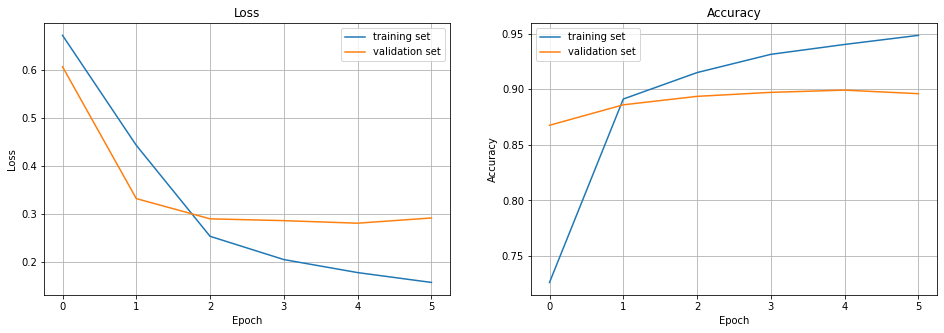

In [9]:
# plot loss and accuracy
fig, axs = plt.subplots(figsize=(16, 5))

ax1 = plt.subplot(121)
ax1.plot(dnn_training_info.history['loss'], label="training set")
ax1.plot(dnn_training_info.history['val_loss'], label="validation set")
ax1.set_title("Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.grid(True)
ax1.legend()

ax2 = plt.subplot(122)
ax2.plot(dnn_training_info.history['accuracy'], label="training set")
ax2.plot(dnn_training_info.history['val_accuracy'], label="validation set")
ax2.set_title("Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.grid(True)
ax2.legend()
plt.show()

In [10]:
# evaluate model
dnn_eval = dnn_model.evaluate(Xtest, ytest, 
                              batch_size=64)

print()
print("------- DNN model evaluation -------")
print("Loss: ", dnn_eval[0])
print("Accuracy: ", dnn_eval[1])

391/391 [==============================] - 1s 1ms/step - loss: 0.3041 - accuracy: 0.8868

------- DNN model evaluation -------
Loss:  0.3040623962879181
Accuracy:  0.8868399858474731


## Decision Trees model

In [11]:
# make validation sets to test hyperparameters
Xtrain_tree, Xval_tree, ytrain_tree, yval_tree = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=1)

In [12]:
# build the model with best max depth
def build_tree_model(criterion='gini', 
                     random_state=22, 
                     max_depth_MIN=2,
                     max_depth_MAX=30):
    
    # loop through custom max depths until the best accuracy score is reached
    score = []
    for i in range(max_depth_MIN, max_depth_MAX):
        tree_model = DecisionTreeClassifier(criterion=criterion, 
                                            random_state=random_state, 
                                            max_depth=i)       
        tree_model.fit(Xtrain_tree, ytrain_tree)
        score.append(tree_model.score(Xval_tree, yval_tree))

        # get the best accuracy score and the corresponding max_depth
        (max_score, max_score_depth) = (max(score), score.index(max(score)) + max_depth_MIN)
    
    print("------- Max_depth of the best accuracy score (validation set) -------")
    print("score: ", max_score)
    print("depth: ", max_score_depth)
    
    # return the model with best max_depth parameter
    tree_model = DecisionTreeClassifier(criterion=criterion, 
                                        random_state=random_state, 
                                        max_depth=max_score_depth).fit(Xtrain_tree, ytrain_tree)
    
    return tree_model

In [13]:
tree_model = build_tree_model(max_depth_MIN=20, max_depth_MAX=30)

------- Max_depth of the best accuracy score (validation set) -------
score:  0.7372
depth:  24


In [19]:
print(tree_model)

DecisionTreeClassifier(max_depth=24, random_state=22)


In [25]:
# evaluate the model on the test set
print("------- Decision Tree model evaluation -------")
print("Accuracy: ", (tree_model).score(Xtest, ytest))
print("Tree Depth: ", tree_model.get_depth())

------- Decision Tree model evaluation -------
Accuracy:  0.7356
Tree Depth:  24
